In [42]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import numpy as np

# import dataset
1. connectome data
2. age data
3. NIH score data

In [17]:
connectome = pd.read_csv('../dMRI network analysis/data/con_aparc_count.csv', index_col=0)
nih_demo = pd.read_csv('../dMRI network analysis/data/demo.nih.cbcl.els.11875.csv', index_col=0)
nih = nih_demo.loc[:, :'nihtbx_picvocab_uncorrected'].dropna()
demo = nih_demo.iloc[:, -11:].dropna()

In [28]:
merged_data = pd.concat([connectome, nih, demo], join='inner', axis=1)

In [37]:
corr_result = pd.DataFrame()
for measure in connectome.columns:
    corr_result = pd.concat([corr_result, pd.DataFrame(pg.corr(merged_data[measure], merged_data['age']))], axis=0)

C:\Users\jungw\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [38]:
corr_result.index = connectome.columns
corr_result

,n,r,CI95%,p-val,BF10,power
con_L-BSTS_L-CACG_count,9408,-0.014848,"[-0.04, 0.01]",0.149843,0.036,0.301929
con_L-BSTS_L-CMFG_count,9408,-0.022877,"[-0.04, -0.0]",0.026492,0.151,0.602233
con_L-BSTS_L-CU_count,9408,0.018020,"[-0.0, 0.04]",0.080513,0.059,0.416093
con_L-BSTS_L-EC_count,9408,-0.009509,"[-0.03, 0.01]",0.356411,0.02,0.151674
con_L-BSTS_L-FG_count,9408,0.028578,"[0.01, 0.05]",0.005569,0.602,0.791733
...,...,...,...,...,...,...
con_R-TP_R-IN_count,9408,-0.047665,"[-0.07, -0.03]",0.000004,570.274,0.996166
con_R-TP_R-CER_count,9408,-0.000968,"[-0.02, 0.02]",0.925177,0.013,0.051009
con_R-TTG_R-IN_count,9408,0.009473,"[-0.01, 0.03]",0.358241,0.02,0.150882
con_R-TTG_R-CER_count,9408,-0.004041,"[-0.02, 0.02]",0.695144,0.014,0.067770


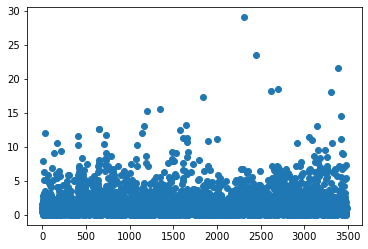

In [46]:
plt.scatter(np.arange(len(corr_result['p-val'])), -np.log10(corr_result['p-val']))

In [49]:
bonf = 0.05 / 3486
cond = corr_result['p-val'] < bonf
corr_result.loc[cond, :].sort_values(by='r')

,n,r,CI95%,p-val,BF10,power
con_L-TH_L-CA_count,9408,-0.116587,"[-0.14, -0.1]",7.806775e-30,1.143e+26,1.0
con_R-PoCG_R-IN_count,9408,-0.099900,"[-0.12, -0.08]",2.658304e-22,3.922e+18,1.0
con_R-CA_R-SFG_count,9408,-0.092236,"[-0.11, -0.07]",3.120735e-19,3.618e+15,1.0
con_R-TH_R-CA_count,9408,-0.091535,"[-0.11, -0.07]",5.795345e-19,1.963e+15,1.0
con_L-SFG_L-CA_count,9408,-0.089087,"[-0.11, -0.07]",4.842255e-18,2.413e+14,1.0
...,...,...,...,...,...,...
con_R-PCU_R-RMFG_count,9408,0.081526,"[0.06, 0.1]",2.379787e-15,5.36e+11,1.0
con_L-PaCG_R-PrCG_count,9408,0.083327,"[0.06, 0.1]",5.712033e-16,2.186e+12,1.0
con_L-PTR_L-PCU_count,9408,0.084332,"[0.06, 0.1]",2.542429e-16,4.853e+12,1.0
con_R-PaCG_R-PrCG_count,9408,0.091164,"[0.07, 0.11]",8.019524e-19,1.424e+15,1.0


In [72]:
reg_result = pd.DataFrame()
for measure in corr_result.loc[cond, :].index:
    reg_result = pd.concat([reg_result, pd.DataFrame(pg.linear_regression(merged_data['age'], merged_data[measure])).loc[1]],axis=1)
reg_result.loc['names'] = corr_result.loc[cond, :].index
reg_result.T.sort_values(by)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
1,con_L-BSTS_L-MTG_count,-5.430671,0.946159,-5.7397,0.0,0.00349,0.003384,-7.285348,-3.575994
1,con_L-BSTS_L-PrCG_count,-0.393705,0.07818,-5.035868,0.0,0.002689,0.002583,-0.546956,-0.240455
1,con_L-BSTS_L-SPG_count,0.465185,0.10402,4.472091,0.000008,0.002122,0.002016,0.261284,0.669086
1,con_L-BSTS_L-SMG_count,-4.40751,0.615258,-7.16368,0.0,0.005426,0.005321,-5.613549,-3.201472
1,con_L-BSTS_R-PU_count,0.011221,0.00248,4.525374,0.000006,0.002172,0.002066,0.006361,0.016082
...,...,...,...,...,...,...,...,...,...
1,con_R-RMFG_R-SPG_count,0.641994,0.105211,6.101939,0.0,0.003943,0.003837,0.435757,0.848231
1,con_R-SFG_R-IN_count,-2.832594,0.531611,-5.328322,0.0,0.003009,0.002903,-3.874666,-1.790522
1,con_R-SPG_R-IN_count,-1.106174,0.243193,-4.548537,0.000005,0.002195,0.002089,-1.582885,-0.629462
1,con_R-SMG_R-IN_count,-1.957618,0.356079,-5.497714,0.0,0.003203,0.003097,-2.655609,-1.259627


In [66]:
pg.linear_regression(merged_data['age'], merged_data[measure]).iloc[1, :]

names             age
coef        -5.430671
se           0.946159
T             -5.7397
pval              0.0
r2            0.00349
adj_r2       0.003384
CI[2.5%]    -7.285348
CI[97.5%]   -3.575994
Name: 1, dtype: object